# ARIMA Forecasting

This is a study and basic implementation of ARIMA multi-step forecasting. The dataset used is split into training and testing sets. Parameters used for the ARIMA are not tuned, and metrics for studying the model are not defined (tuning and evaluating a model will be done for another study). Lastly, it can be observed that the further the forecast step is, the inaccuracy largely increases.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import numpy as np

# Data Preparation

In [2]:
data = pd.read_csv('ph_tas.csv')
data.head()

,Temperature - (Celsius),Year,Month,Country,ISO3
0,25.5699,1901,Jan,Philippines,PHL
1,24.1451,1901,Feb,Philippines,PHL
2,25.4436,1901,Mar,Philippines,PHL
3,27.0414,1901,Apr,Philippines,PHL
4,27.4015,1901,May,Philippines,PHL


In [3]:
data_play = data['Temperature - (Celsius)']
len(data_play)

1392

Training set

In [4]:
tempr_data = data_play[:-100]
len(tempr_data)

1292

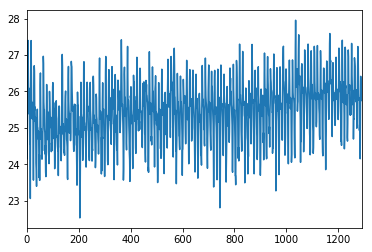

In [5]:
tempr_data.plot()

In [6]:
tempr_data.tail()

1287    26.4157
1288    26.0644
1289    26.1525
1290    26.0829
1291    25.7532
Name: Temperature - (Celsius), dtype: float64

In [7]:
input = tempr_data.values

# ARIMA forecast

In [8]:
model_arima = ARIMA(input, order=(5,1,7))
model_fit = model_arima.fit()

c:\users\neo\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [9]:
predictions = model_fit.forecast(steps=12)
predictions

(array([25.78299171, 25.79375677, 25.57767411, 25.16876509, 24.90359515,
        25.10097778, 25.73085503, 26.40164029, 26.68918717, 26.49446622,
        26.09080154, 25.8289354 ]),
 array([0.37396517, 0.42192701, 0.44089037, 0.4442992 , 0.44466287,
        0.4448912 , 0.44544761, 0.4458379 , 0.4458386 , 0.44597735,
        0.44599673, 0.44824565]),
 array([[25.05003345, 26.51594998],
        [24.96679503, 26.62071851],
        [24.71354487, 26.44180335],
        [24.29795466, 26.03957551],
        [24.03207194, 25.77511836],
        [24.22900705, 25.97294851],
        [24.85779376, 26.60391631],
        [25.52781406, 27.27546651],
        [25.81535957, 27.56301477],
        [25.62036667, 27.36856576],
        [25.21666401, 26.96493907],
        [24.95039007, 26.70748073]]))

In [10]:
preds = predictions[0]

In [11]:
for pred in preds:
    print(pred)

25.782991714606446
25.793756769694692
25.577674111784162
25.168765089624824
24.903595150925888
25.100977782962385
25.73085503433342
26.401640285592674
26.68918716948529
26.4944662190579
26.09080153962373
25.828935398966742


# Plotting

Testing set

In [12]:
temp_series = np.array(data_play[-100:-76])
temp_series

array([26.0891, 25.9654, 25.6959, 25.0161, 24.1465, 25.174 , 26.114 ,
       26.1847, 26.4238, 25.8999, 25.6978, 26.4123, 25.9734, 25.6722,
       25.495 , 24.5257, 24.4225, 25.2749, 26.3652, 26.4783, 27.0725,
       27.0885, 26.1774, 26.0448])

Plot of 'testing' vs 'forecast'

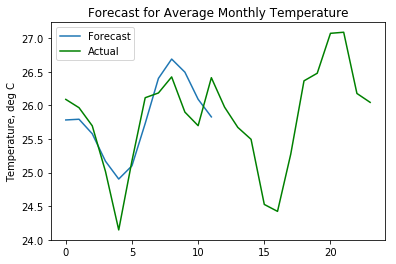

In [13]:
plt.plot(preds, label='Forecast')
plt.plot(temp_series, color='green', label='Actual')
plt.title('Forecast for Average Monthly Temperature')
plt.legend(loc='upper left')
plt.ylabel('Temperature, deg C')
plt.show()